Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])
#XFirstColumn, XSecondColumn = np.hsplit(seven_X, 2)
#print XFirstColumn
#print XSecondColumn

In [4]:
def PerformModel(model, X, y):
    model.fit(X, y)
    w0 = model.intercept_
    wi = model.coef_
    predictions = model.predict(X)
    
    classificationPrediction = []
    for prediction in predictions:
        if prediction > 0:
            classificationPrediction.append(1)
        else:
            classificationPrediction.append(-1)
    trainError = accuracy_score(classificationPrediction, y)
    trainError = str(trainError*100) + "% training accuracy"
    return w0, wi, predictions, classificationPrediction, trainError

def DrawFunctionOnInterval(w, interval):
    XDraw = sp.linspace(interval[0], interval[1])
    yDraw = []
    for x in XDraw:
        yDraw.append((-1)*w[0]/float(w[2]) + (-1)*w[1]*x/float(w[2]))
    plt.plot(XDraw, yDraw, "r--")
    
def JoinCoef(w0, wi):
    w0 = np.array([w0])
    return np.concatenate((w0, wi))

[ 2.1]
[[-0.5 -0.1]]
[ 1  1  1  1 -1 -1 -1]
[1, 1, 1, 1, -1, -1, -1]
100.0% training accuracy


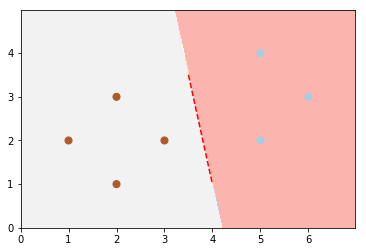

In [5]:
model = RidgeClassifier(alpha=0)
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, seven_X, seven_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : model.predict(x) >= 0)
DrawFunctionOnInterval(JoinCoef(w0[0], wi[0]), [3.5,4])

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

2.1
[-0.5 -0.1]
[ 1.   0.8  1.4  0.4 -0.6 -0.8 -1.2]
[1, 1, 1, 1, -1, -1, -1]
100.0% training accuracy


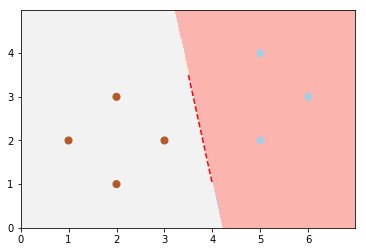

In [6]:
model = LinearRegression()
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, seven_X, seven_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : model.predict(x) >= 0)
DrawFunctionOnInterval(JoinCoef(w0, wi), [3.5,4])

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

0.84938704028
[-0.4028021   0.30823117]
[ 0.35201401  0.96847636  1.06304729  0.25744308 -0.54816112  0.06830123
 -0.64273205 -1.51838879]
[1, 1, 1, 1, -1, 1, -1, -1]
87.5% training accuracy


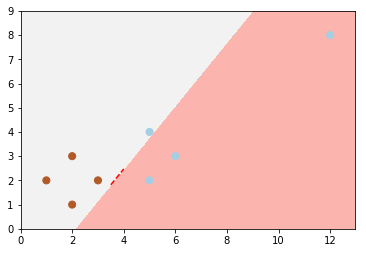

In [8]:
model = LinearRegression()
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, outlier_X, outlier_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : model.predict(x) >= 0)
DrawFunctionOnInterval(JoinCoef(w0, wi), [3.5,4])

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

1.50505050505
[-0.4040404  -0.08080808]
[ 0.61616162  0.45454545  0.93939394  0.13131313 -0.67676768 -0.83838384
 -1.16161616  0.53535354]
[1, 1, 1, 1, -1, -1, -1, 1]
87.5% training accuracy


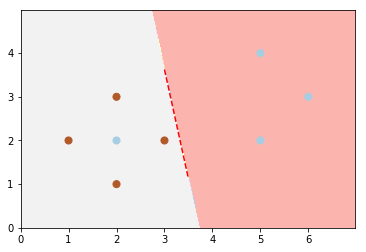

In [10]:
model = LinearRegression()
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, unsep_X, unsep_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : model.predict(x) >= 0)
DrawFunctionOnInterval(JoinCoef(w0, wi), [3,3.5])

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [11]:
from sklearn.datasets import make_classification

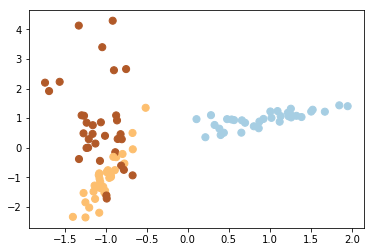

In [12]:
X2, y2 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)
#y2 is either 0,1,2
mlutils.plot_2d_clf_problem(X2, y2, h=None)

In [13]:
def DataSieve0(array):
    newArray = []
    for y in array:
        if y == 0:
            newArray.append(1)
        else:
            newArray.append(-1)
    return newArray
def DataSieve1(array):
    newArray = []
    for y in array:
        if y == 1:
            newArray.append(1)
        else:
            newArray.append(-1)
    return newArray
def DataSieve2(array):
    newArray = []
    for y in array:
        if y == 2:
            newArray.append(1)
        else:
            newArray.append(-1)
    return newArray

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

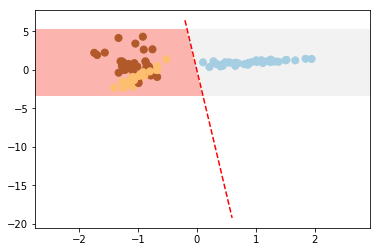

In [14]:
#if the example belongs to the class, then it should be 1, else it should be -1
model0 = LinearRegression()

w0, wi, predictions, classificationPrediction, trainError = PerformModel(model0, X2, np.apply_along_axis(DataSieve0, 0, y2))
model0Coef = JoinCoef(w0, wi)

DrawFunctionOnInterval(model0Coef, [-0.2,0.6])
mlutils.plot_2d_clf_problem(X2, y2, h=lambda x : model0.predict(x) >= 0)

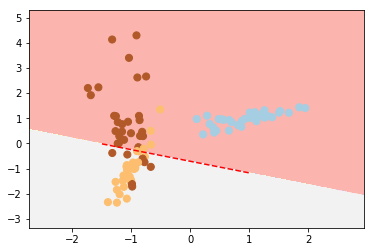

In [15]:
model1 = LinearRegression()

w0, wi, predictions, classificationPrediction, trainError = PerformModel(model1, X2, np.apply_along_axis(DataSieve1, 0, y2))
model1Coef = JoinCoef(w0, wi)

DrawFunctionOnInterval(model1Coef, [-1.5,1])
mlutils.plot_2d_clf_problem(X2, y2, h=lambda x : model1.predict(x) >= 0)

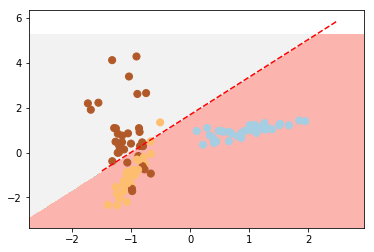

In [16]:
model2 = LinearRegression()

w0, wi, predictions, classificationPrediction, trainError = PerformModel(model2, X2, np.apply_along_axis(DataSieve2, 0, y2))
model2Coef = JoinCoef(w0, wi)

DrawFunctionOnInterval(model2Coef,[-1.5,2.5])
mlutils.plot_2d_clf_problem(X2, y2, h=lambda x : model2.predict(x) >= 0)

In [17]:
def MetaModel(model0, model1, model2, X):
    predictions = []
    hs = []
    for example in X:
        example = example.reshape(1, -1)
        h0 = model0.predict(example)
        h1 = model1.predict(example)
        h2 = model2.predict(example)
        hs.append([h0,h1,h2])
        if h0 > h1:
            if h0 > h2:
                predictions.append(0)
            elif h2 > h1:
                predictions.append(2)
        elif h1 > h2:
            predictions.append(1)
        else:
            predictions.append(2)
    
    return predictions, hs

def DrawEquidistantFunctionOnInterval(w1, w2, interval, color):
    XDraw = sp.linspace(interval[0], interval[1])
    yDraw = []
    for x in XDraw:
        w1Result = (-1)*w1[0]/float(w1[2]) + (-1)*w1[1]*x/float(w1[2])
        w2Result = (-1)*w2[0]/float(w2[2]) + (-1)*w2[1]*x/float(w2[2])
        yDraw.append((w1Result + w2Result)/float(2))
    plt.plot(XDraw, yDraw, color)

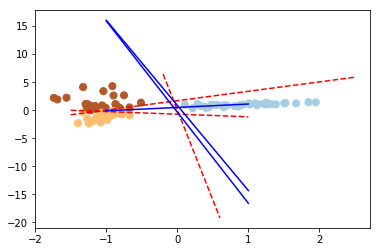

In [18]:
predictions, hs = MetaModel(model0, model1, model2, X2)
#print predictions
#print hs

DrawFunctionOnInterval(model0Coef, [-0.2,0.6])
DrawFunctionOnInterval(model1Coef, [-1.5,1])
DrawFunctionOnInterval(model2Coef, [-1.5,2.5])
DrawEquidistantFunctionOnInterval(model0Coef, model1Coef, [-1,1], "b")
DrawEquidistantFunctionOnInterval(model1Coef, model2Coef, [-1,1], "b")
DrawEquidistantFunctionOnInterval(model0Coef, model2Coef, [-1,1], "b")
mlutils.plot_2d_clf_problem(X2, predictions, h=None)

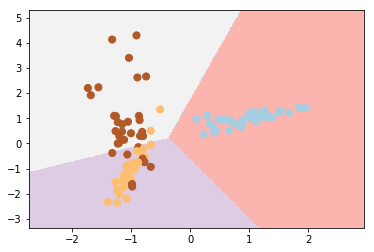

In [19]:
def LambdaMetaModel(x):
    x = x.reshape(1, -1)
    return np.argmax([model0.predict(x), model1.predict(x), model2.predict(x)])

mlutils.plot_2d_clf_problem(X2, y2, h=LambdaMetaModel)

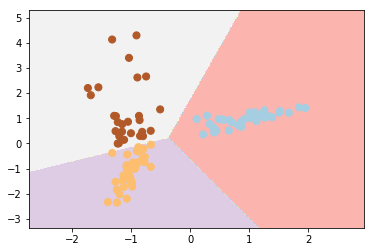

In [20]:
model = RidgeClassifier(alpha=0)

w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, X2, y2)

mlutils.plot_2d_clf_problem(X2, predictions, h=model.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [21]:
def sigm(x, alpha):
    return (1/float(1 + (math.e**(-alpha*x))))

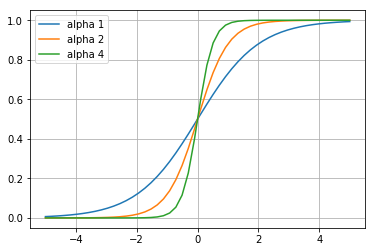

In [22]:
alphas = [1, 2, 4]
XDraw = sp.linspace(-5, 5)

for alpha in alphas:
    yDraw = []
    for x in XDraw:
        yDraw.append(sigm(x, alpha))
    plt.plot(XDraw, yDraw)
    
plt.legend(["alpha 1", "alpha 2", "alpha 4"])
plt.grid()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [23]:
# Vaš kôd ovdje...

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [24]:
# Vaš kôd ovdje...

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

In [25]:
# Vaš kôd ovdje...

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [26]:
from sklearn.metrics import zero_one_loss

In [27]:
# Vaš kôd ovdje...


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

In [28]:
# Vaš kôd ovdje...

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

In [29]:
# Vaš kôd ovdje...

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


In [30]:
# Vaš kôd ovdje...

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

In [31]:
# Vaš kôd ovdje...

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [32]:
# Vaš kôd ovdje...

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [33]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

In [34]:
# Vaš kôd ovdje...

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

In [35]:
# Vaš kôd ovdje...

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?